In [2]:
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df=pd.read_csv("knn.csv")
print(df)



   Weight  Texture    Fruit
0     150        0   Apple 
1     170        0    apple
2     140        0   apple 
3     130        1  orange 
4     160        1  orange 
5     180        1  orange 
6     120        0   apple 
7     200        1   orange


accuracy: 0.0


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Apple ', 'Apple ', 'Apple '], dtype=object)

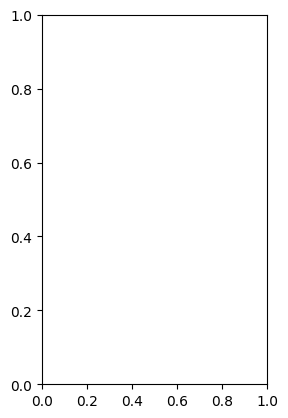

In [8]:
x=df[["Weight","Texture"]]
y=df["Fruit"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("accuracy:",metrics.accuracy_score(y_test,y_pred))

# plt.scatter(y_test,y_pred,color='teal',edgecolors='black')
# plt.title("Actual Prediction")
# plt.xlabel("actualclass")
# plt.ylabel("predicted class")

#drawing scatter plot
plt.subplot(1,2,1)
plt.scatter(x_test["Weight"],x_test["Texture"],c=y_pred)
plt.title("Predicted classification")
plt.xlabel("Weight")
plt.ylabel("Texture")
plt.subplot(1,2,2)
plt.scatter(x_test["Weight"],x_test["Texture"],c=y_test,cmap="rainbow")
plt.xlabel("Weight")
plt.ylabel("Texture")
plt.show()


plt.Subplot(1,2,1)
plt.scatter(y_)

sample=[[155,0]]
pred=model.predict(sample)
print("predicted fruit:",pred[0])




print(confusion_matrix(y_test,y_pred))

In [ ]:
#Below is the correct answer

Accuracy: 0.0


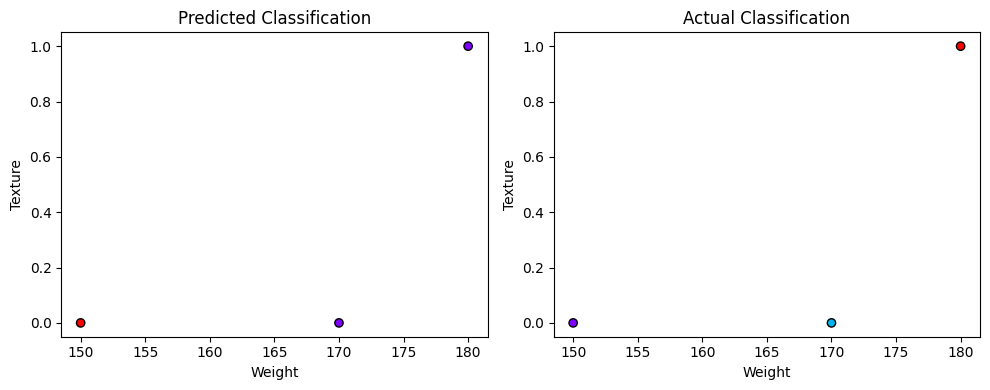

Predicted fruit: orange 

Confusion Matrix:
[[0 0 0 1]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 1 0]]


C:\Users\ammus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode fruit names into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(df["Fruit"])  # Converts 'Apple', 'Orange' → 0, 1, 2, etc.

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(df[["Weight", "Texture"]], y_encoded, test_size=0.3, random_state=42)

# Train model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Draw scatter plots
plt.figure(figsize=(10,4))

# Predicted classification
plt.subplot(1,2,1)
plt.scatter(x_test["Weight"], x_test["Texture"], c=y_pred, cmap='rainbow', edgecolor='black')
plt.title("Predicted Classification")
plt.xlabel("Weight")
plt.ylabel("Texture")

# Actual classification
plt.subplot(1,2,2)
plt.scatter(x_test["Weight"], x_test["Texture"], c=y_test, cmap='rainbow', edgecolor='black')
plt.title("Actual Classification")
plt.xlabel("Weight")
plt.ylabel("Texture")

plt.tight_layout()
plt.show()

# Predict a new fruit
sample = [[155, 0]]
pred = model.predict(sample)
print("Predicted fruit:", le.inverse_transform(pred)[0])  # Decode back to fruit name

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


   weight  size    Fruit
0     150     7   Apple 
1     170     8   Apple 
2     140     6   Apple 
3     200    10  Orange 
4     210    11  Orange 
5     190     9   Orange
prediction: [0]
predicted fruit: Apple 
accuracy: 1.0


C:\Users\ammus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ammus\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


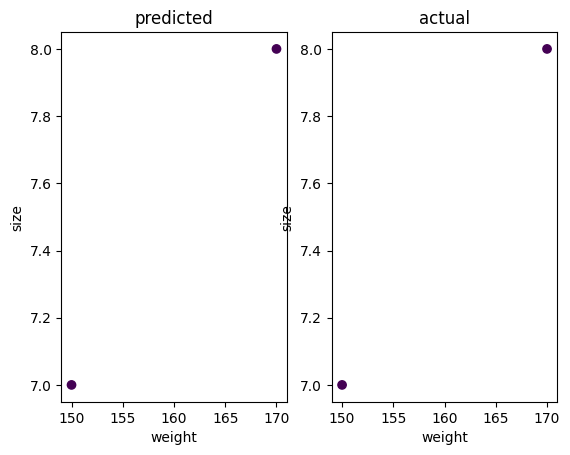

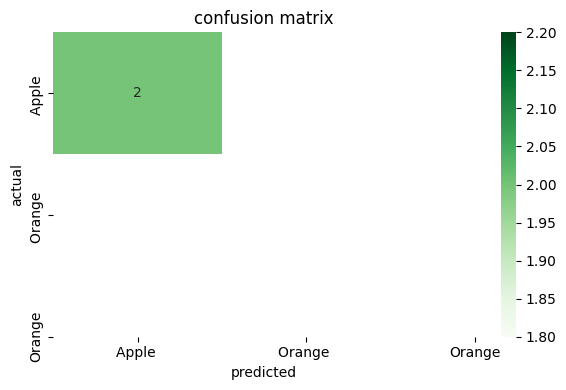

In [3]:
#another ques

from sklearn.preprocessing import LabelEncoder


df=pd.read_csv("sample.csv")
df.columns = df.columns.str.strip()


print(df)

x=df[["weight","size"]]
# y=df["Fruit"]

# Convert Fruit Names to numbers for model & plotting
le=LabelEncoder()
y=le.fit_transform(df["Fruit"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

new=[[160,7.5]]
pred=model.predict(new)
print("prediction:",pred)
print("predicted fruit:",le.inverse_transform(pred)[0])

print("accuracy:",metrics.accuracy_score(y_test,y_pred))

plt.subplot(1,2,1)
plt.scatter(x_test['weight'],x_test['size'],c=y_pred)
plt.title("predicted")
plt.xlabel("weight")
plt.ylabel("size")

plt.subplot(1,2,2)
plt.scatter(x_test['weight'],x_test['size'],c=y_test)
plt.title("actual")
plt.xlabel("weight")
plt.ylabel("size")

conf=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sb.heatmap(conf,annot=True,fmt='d',cmap='Greens',
           xticklabels=df['Fruit'].unique(),
           yticklabels=df['Fruit'].unique()
           )
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.tight_layout()